## 개념

**(1) 최대 마진 분류기(`MMC`: Maximal Margin Classifier)**

**(2) 서포트 벡터 분류기 (`SVC`: Support Vector Classifier)**

**(3) 서포트 벡터 머신 (`SVM`: Support Vector Machine)**

**(4) 서포트 벡터 회귀 (`SVR`: Support Vector Regression)**

## scikit-learn의 LinearSVC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C=pd.read_csv('../../dataset/classification.csv')
C

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q0gkmu59 because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


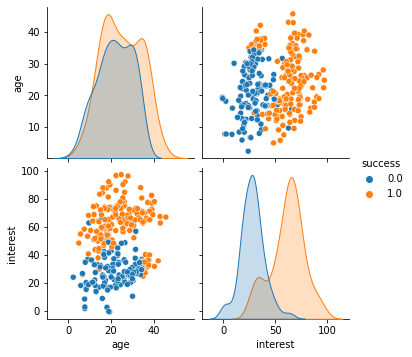

In [2]:
sns.pairplot(hue='success', data=C)

In [3]:
from sklearn.model_selection import train_test_split

x = C[['age', 'interest']]
y = C['success']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


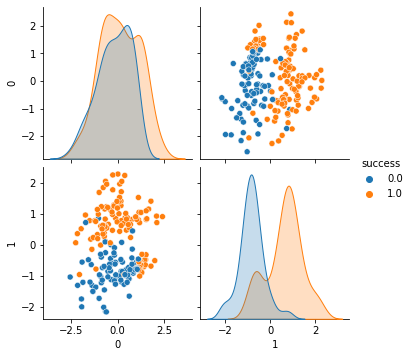

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1), hue='success')

In [5]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도:\t {round(test_acc * 100, 2)}')
print(f'정밀도:\t {round(test_prc * 100, 2)}')
print(f'재현율:\t {round(test_rcll * 100, 2)}')
print(f'F1:\t {round(test_f1 * 100, 2)}')

[[37  2]
 [ 2 49]]


정확도:	 95.56
정밀도:	 96.08
재현율:	 96.08
F1:	 96.08


/opt/virtualenvs/python3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


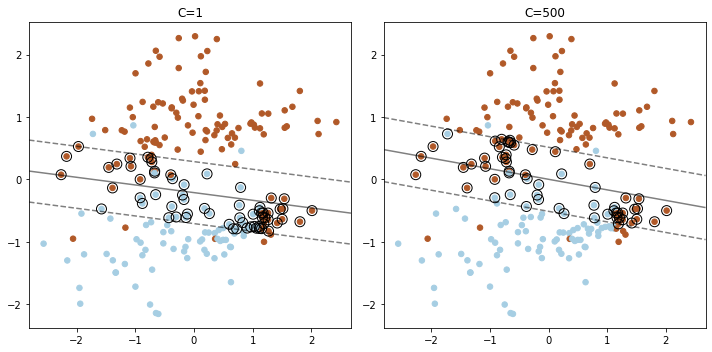

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss='hinge', random_state=42).fit(train_x, train_y)
    
    decision_function = clf.decision_function(train_x)
    support_vectors_indicies = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vectors_indicies]
    
    plt.subplot(1, 2, i + 1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c = train_y, s = 30, cmap=plt.cm.Paired)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f'C={str(C)}')
plt.tight_layout()
plt.show()

## scikit-learn의 SVR

In [8]:
import numpy as np

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.09098548]
 [0.16635354]
 [0.27894534]
 [0.45600254]
 [0.6171232 ]
 [0.6633364 ]] 

 [0.09086    0.16558734 0.27534191 0.44036263 0.5786914  0.61574917
 0.62067072 0.62089821 0.67014043 0.74115975]


In [9]:
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.9264036   0.16558734  0.27534191  0.44036263  0.5786914   1.37511844
  0.62067072  0.62089821  0.67014043  0.74115975]


In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma=0.1, degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma=0.1, kernel='poly')

In [11]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['mae'] = round(mae, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    
results

,mse,rmse,mae
Random_Forest,0.11,0.33,0.17
linear,0.3,0.55,0.39
Polynomial,0.1,0.32,0.17


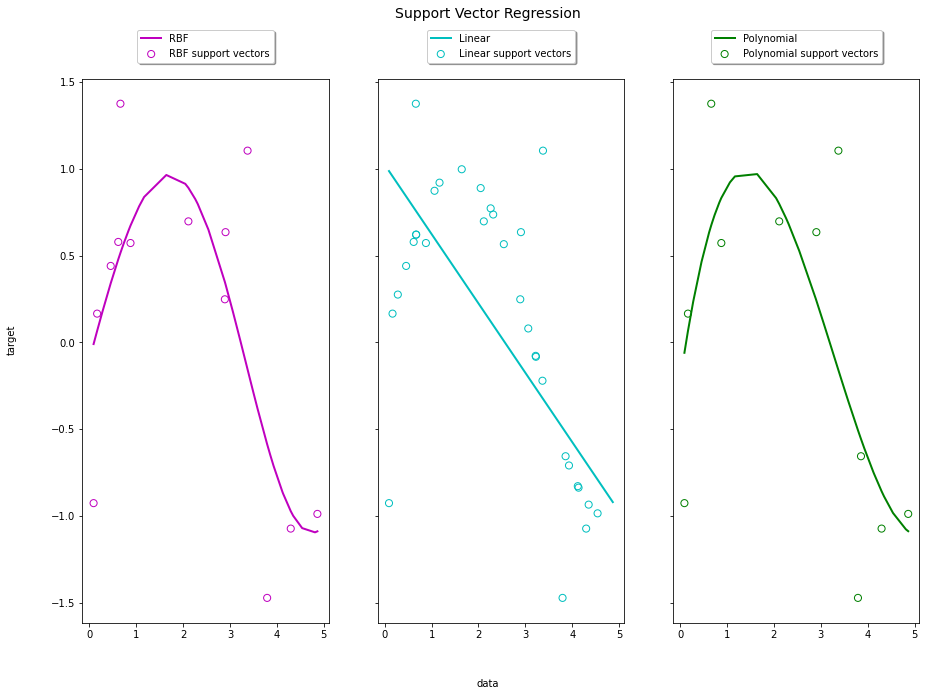

In [12]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X, 
        svr.fit(X, y).predict(X), 
        color = model_color[ix], 
        lw=lw, 
        label=f'{kernel_label[ix]}')
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor='none',
        edgecolor=model_color[ix],
        s=50,
        label=f'{kernel_label[ix]} support vectors')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)
    
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)
plt.show()